# National Immunization and Health Survey Dataset

## Background
The dataset provides vital information from health surveys conducted across multiple countries and years. These surveys assess vaccination coverage and other indicators that influence public health. By analyzing this dataset, we aim to better understand global health trends and the factors affecting vaccination success rates.

## Objective
The primary objective of this analysis is to uncover key insights about vaccination coverage and related health indicators. We aim to identify trends, regional disparities, and factors that contribute to vaccination success rates. These findings will inform future decision-making and resource allocation in public health.

## Research Questions
1. How has the vaccination percentage changed across different survey years?
2. What trends do we observe in specific vaccines (BCG, DPT, Fully Vaccinated, etc.) over time?
3. How do vaccination rates vary by country?
4. What factors might contribute to higher or lower vaccination rates in certain regions?

## Data Description
The dataset used in this analysis is the "immunization_national_ken" dataset from ***Data.Humdata.org***. It contains 350 records with features such as'ISO3','DataId','Indicator','Value','Precision','DHS_CountryCode','CountryName','SurveyYear','SurveyId','IndicatorId','IndicatorOrder',
'IsTotal', 'IsPreferred','SurveyType', 'DenominatorWeighted',and 'DenominatorUnweighted'. Missing values, duplicates, and outliers were addressed as Feature engineering metrics like ratios, percentages, and log-transformed features were added in the dataset.

## Methodology
The analysis will involve the following :

1. **Data Cleaning:** Resolved missing values and duplicates, and removed outliers using statistical methods like IQR
2. **Exploratory Data Analysis (EDA):** Visualized distributions, correlations, and trends using histograms, boxplots, line charts, and   heatmaps.
3. **Feature Engineering:** Created new metrics, including ratios between weighted and unweighted denominators, vaccination percentages, and log-transformed features.

## Significance
This analysis is instrumental in improving public health initiatives. By understanding vaccination coverage trends and identifying factors contributing to disparities, stakeholders can better target interventions and allocate resources. The engineered features and insights derived from this dataset have the potential to shape policies and ensure more equitable health outcomes globally.

## NON-TECHNICAL CONTENT
**1. Tableau[Link](https://public.tableau.com/app/profile/ian.moire/viz/Book1_17460999542570/VACCIANTIONTRENDSACROSSSURVEYYEARS#1)**

**2. Presentation[Link](https://docs.google.com/presentation/d/1eon7pHcQ-aUofkpP8Nft0lICDcpFDRZLfFQRMyS56g8/edit?slide=id.g35f391192_00#slide=id.g35f391192_00)**

## Use the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Open the dataset

In [3]:
df = pd.read_excel('/Users/mac/Documents/DATA.HUMDATA.ORG/immunization_national_ken.xls')
df

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,254751,Number of children 12-23 months (unweighted),1302,0,KE,Kenya,1989,KE1989DHS,CH_VACS_C_UNW,...,1.0,CHVACSCUNW,NaN,1989,DHS,NaN,NaN,NaN,NaN,NaN
2,KEN,254744,Number of children 12-23 months (unweighted),1323,0,KE,Kenya,1989,KE1989DHS,CH_VACS_C_UNW,...,0.0,CHVACSCUNW,NaN,1989,DHS,NaN,NaN,NaN,NaN,NaN
3,KEN,555943,BCG vaccination received,59,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_BCG,...,1.0,CHVACCCBCG,NaN,1989,DHS,1315.0,1302.0,NaN,NaN,NaN
4,KEN,555949,DPT 1 vaccination received,60.3,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_DP1,...,1.0,CHVACCCDP1,NaN,1989,DHS,1315.0,1302.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,KEN,633006,Fully vaccinated (8 basic antigens),74.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_BAS,...,1.0,CHVAC1CBAS,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
346,KEN,633007,Received no vaccinations in first year,6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NON,...,1.0,CHVAC1CNON,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
347,KEN,633008,Percentage showing a vaccination card,68.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_VCD,...,1.0,CHVAC1CVCD,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
348,KEN,16210,Number of children one to four years of age,6554,0,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NUM,...,1.0,CHVAC1CNUM,NaN,2022,DHS,NaN,7314.0,NaN,NaN,NaN


In [4]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISO3                    350 non-null    object 
 1   DataId                  350 non-null    object 
 2   Indicator               350 non-null    object 
 3   Value                   350 non-null    object 
 4   Precision               350 non-null    object 
 5   DHS_CountryCode         349 non-null    object 
 6   CountryName             350 non-null    object 
 7   SurveyYear              350 non-null    object 
 8   SurveyId                350 non-null    object 
 9   IndicatorId             350 non-null    object 
 10  IndicatorOrder          349 non-null    float64
 11  IndicatorType           349 non-null    object 
 12  CharacteristicId        349 non-null    float64
 13  CharacteristicOrder     349 non-null    float64
 14  CharacteristicCategory  349 non-null    ob

In [5]:
# Get the data types of the dataset
df.dtypes

ISO3                       object
DataId                     object
Indicator                  object
Value                      object
Precision                  object
DHS_CountryCode            object
CountryName                object
SurveyYear                 object
SurveyId                   object
IndicatorId                object
IndicatorOrder            float64
IndicatorType              object
CharacteristicId          float64
CharacteristicOrder       float64
CharacteristicCategory     object
CharacteristicLabel        object
ByVariableId               object
ByVariableLabel            object
IsTotal                   float64
IsPreferred               float64
SDRID                      object
RegionId                  float64
SurveyYearLabel            object
SurveyType                 object
DenominatorWeighted       float64
DenominatorUnweighted     float64
CILow                     float64
CIHigh                    float64
LevelRank                 float64
dtype: object

In [6]:
# Get the rows and columns of the dataset
df.shape

(350, 29)

In [7]:
# Check for missing values
df.isnull().sum()

ISO3                        0
DataId                      0
Indicator                   0
Value                       0
Precision                   0
DHS_CountryCode             1
CountryName                 0
SurveyYear                  0
SurveyId                    0
IndicatorId                 0
IndicatorOrder              1
IndicatorType               1
CharacteristicId            1
CharacteristicOrder         1
CharacteristicCategory      1
CharacteristicLabel         1
ByVariableId                0
ByVariableLabel           181
IsTotal                     1
IsPreferred                 1
SDRID                       1
RegionId                  350
SurveyYearLabel             1
SurveyType                  1
DenominatorWeighted        29
DenominatorUnweighted      29
CILow                     350
CIHigh                    350
LevelRank                 350
dtype: int64

## Handling Duplicates

In [8]:
# Drop duplicate rows
df.drop_duplicates()

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,254751,Number of children 12-23 months (unweighted),1302,0,KE,Kenya,1989,KE1989DHS,CH_VACS_C_UNW,...,1.0,CHVACSCUNW,NaN,1989,DHS,NaN,NaN,NaN,NaN,NaN
2,KEN,254744,Number of children 12-23 months (unweighted),1323,0,KE,Kenya,1989,KE1989DHS,CH_VACS_C_UNW,...,0.0,CHVACSCUNW,NaN,1989,DHS,NaN,NaN,NaN,NaN,NaN
3,KEN,555943,BCG vaccination received,59,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_BCG,...,1.0,CHVACCCBCG,NaN,1989,DHS,1315.0,1302.0,NaN,NaN,NaN
4,KEN,555949,DPT 1 vaccination received,60.3,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_DP1,...,1.0,CHVACCCDP1,NaN,1989,DHS,1315.0,1302.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,KEN,633006,Fully vaccinated (8 basic antigens),74.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_BAS,...,1.0,CHVAC1CBAS,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
346,KEN,633007,Received no vaccinations in first year,6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NON,...,1.0,CHVAC1CNON,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
347,KEN,633008,Percentage showing a vaccination card,68.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_VCD,...,1.0,CHVAC1CVCD,NaN,2022,DHS,6554.0,7314.0,NaN,NaN,NaN
348,KEN,16210,Number of children one to four years of age,6554,0,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NUM,...,1.0,CHVAC1CNUM,NaN,2022,DHS,NaN,7314.0,NaN,NaN,NaN


## Handling Missing Values

In [9]:
# Drop columns with excessive missing values
df = df.drop(columns=['RegionId', 'CILow', 'CIHigh', 'LevelRank'])
df.isnull().sum()

ISO3                        0
DataId                      0
Indicator                   0
Value                       0
Precision                   0
DHS_CountryCode             1
CountryName                 0
SurveyYear                  0
SurveyId                    0
IndicatorId                 0
IndicatorOrder              1
IndicatorType               1
CharacteristicId            1
CharacteristicOrder         1
CharacteristicCategory      1
CharacteristicLabel         1
ByVariableId                0
ByVariableLabel           181
IsTotal                     1
IsPreferred                 1
SDRID                       1
SurveyYearLabel             1
SurveyType                  1
DenominatorWeighted        29
DenominatorUnweighted      29
dtype: int64

In [10]:
# Fill missing values for numerical and categorical columns
df['DenominatorWeighted'].fillna(df['DenominatorWeighted'].median(), inplace=True)
df['DHS_CountryCode'].fillna("Unknown", inplace=True)

In [11]:
# Fill missing values for numerical and categorical columns
df['DenominatorUnweighted'].fillna(df['DenominatorUnweighted'].median(), inplace=True)

In [12]:
# Group the categorical column with the word 'NOt Specified'
df['ByVariableLabel'].fillna("Not Specified", inplace=True)

In [13]:
df.isnull().sum()

ISO3                      0
DataId                    0
Indicator                 0
Value                     0
Precision                 0
DHS_CountryCode           0
CountryName               0
SurveyYear                0
SurveyId                  0
IndicatorId               0
IndicatorOrder            1
IndicatorType             1
CharacteristicId          1
CharacteristicOrder       1
CharacteristicCategory    1
CharacteristicLabel       1
ByVariableId              0
ByVariableLabel           0
IsTotal                   1
IsPreferred               1
SDRID                     1
SurveyYearLabel           1
SurveyType                1
DenominatorWeighted       0
DenominatorUnweighted     0
dtype: int64

In [14]:
# Fill missing values with "Unknown" for categorical columns
categorical_columns = ['IndicatorType', 'CharacteristicId', 'CharacteristicOrder',
                       'CharacteristicCategory', 'CharacteristicLabel', 
                       'SDRID', 'SurveyYearLabel', 'SurveyType']
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

In [15]:
# Fill missing numerical values with median
df['IndicatorOrder'].fillna(df['IndicatorOrder'].median(), inplace=True)

In [16]:
# Fill binary/mode-based columns
df['IsTotal'].fillna(df['IsTotal'].mode()[0], inplace=True)
df['IsPreferred'].fillna(df['IsPreferred'].mode()[0], inplace=True)

In [17]:
# Recheck if the dataset was cleaned
df.isnull().sum()

ISO3                      0
DataId                    0
Indicator                 0
Value                     0
Precision                 0
DHS_CountryCode           0
CountryName               0
SurveyYear                0
SurveyId                  0
IndicatorId               0
IndicatorOrder            0
IndicatorType             0
CharacteristicId          0
CharacteristicOrder       0
CharacteristicCategory    0
CharacteristicLabel       0
ByVariableId              0
ByVariableLabel           0
IsTotal                   0
IsPreferred               0
SDRID                     0
SurveyYearLabel           0
SurveyType                0
DenominatorWeighted       0
DenominatorUnweighted     0
dtype: int64

## Handling Outliers

In [18]:
# Extract all numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numeric_columns)

Numerical Columns: Index(['IndicatorOrder', 'IsTotal', 'IsPreferred', 'DenominatorWeighted',
       'DenominatorUnweighted'],
      dtype='object')


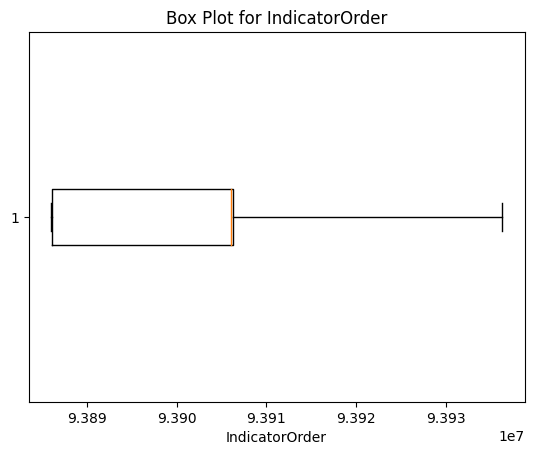

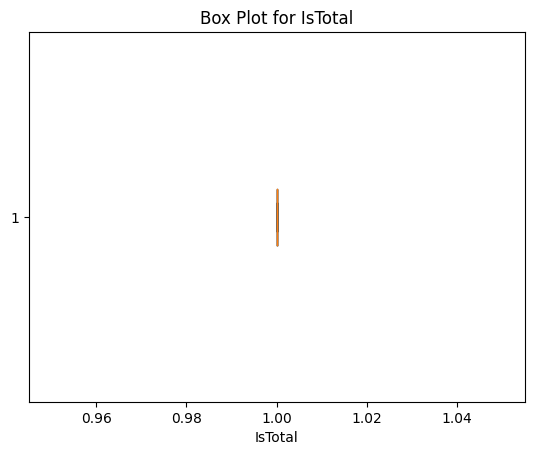

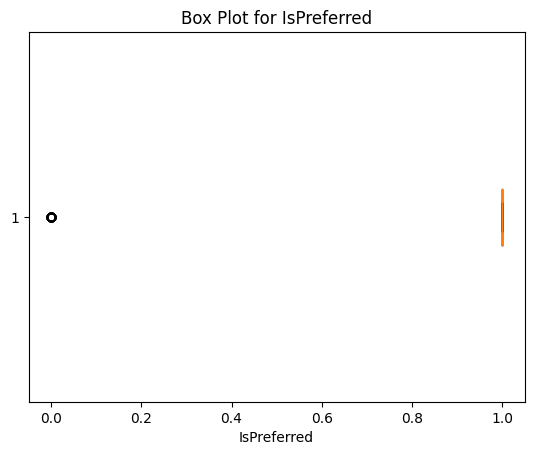

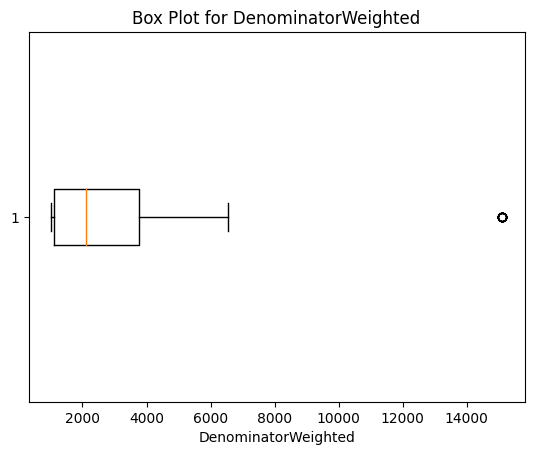

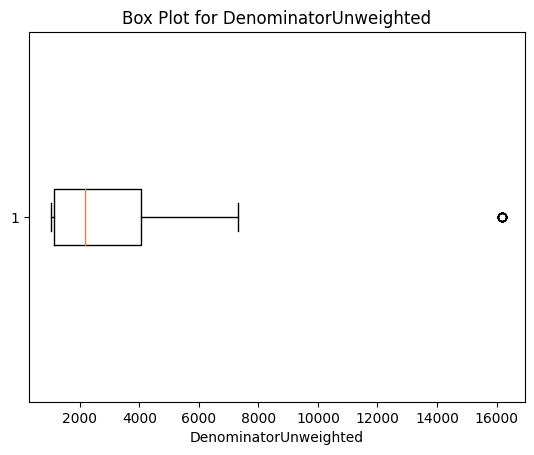

In [19]:
# Boxplots for all numerical columns
for column in numeric_columns:
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
    plt.show()

In [20]:
# Define a function to detect outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    # Filter rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function to each column
df = remove_outliers_iqr(df, 'DenominatorWeighted')
df = remove_outliers_iqr(df, 'DenominatorUnweighted')
df = remove_outliers_iqr(df, 'IsPreferred')


In [21]:
# Summary statistics after removing outliers
print(df[['DenominatorWeighted', 'DenominatorUnweighted', 'IsPreferred']].describe())

       DenominatorWeighted  DenominatorUnweighted  IsPreferred
count           252.000000             252.000000        252.0
mean           2634.059524            2756.936508          1.0
std            1578.310035            1719.935921          0.0
min            1096.000000            1099.000000          1.0
25%            1124.000000            1119.000000          1.0
50%            2118.000000            2167.000000          1.0
75%            3777.000000            4052.000000          1.0
max            6554.000000            7314.000000          1.0


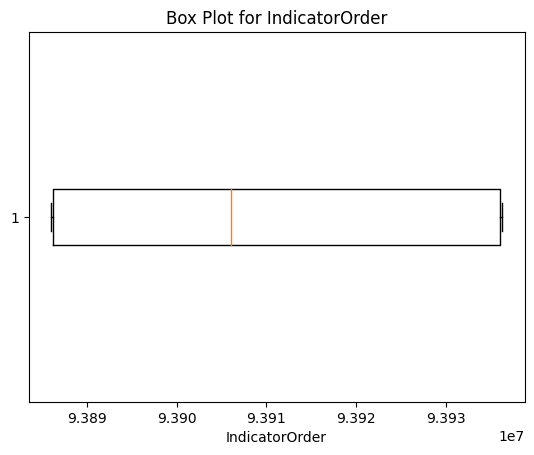

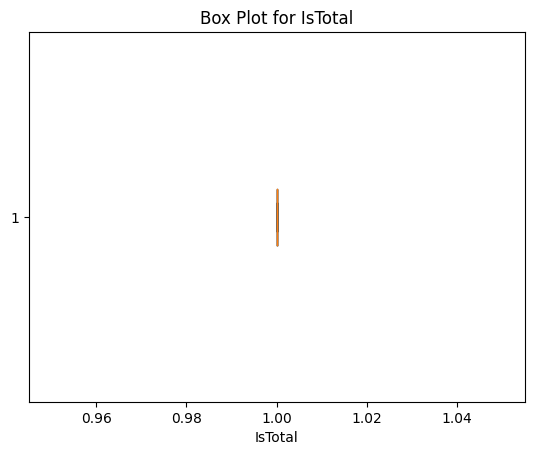

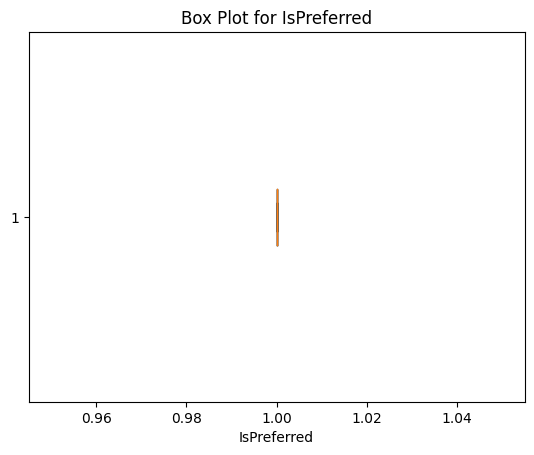

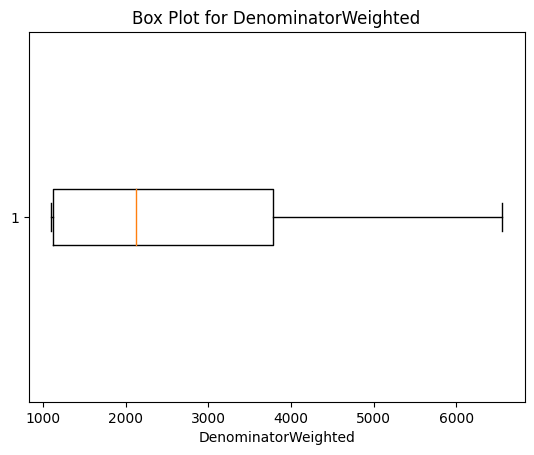

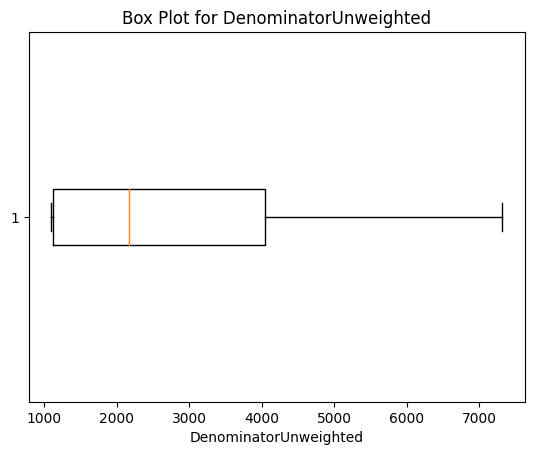

In [22]:
# Boxplots for all numerical columns
# To confirm if all the outliers were removed
for column in numeric_columns:
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
    plt.show()

In [23]:
# Assign cleaned dataset to a new variable
df_cleaned = df
df_cleaned

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,CharacteristicLabel,ByVariableId,ByVariableLabel,IsTotal,IsPreferred,SDRID,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,Unknown,#country+name,#date+year,#survey+id,#indicator+code,...,Unknown,#indicator+label+code,#indicator+label,1.0,1.0,Unknown,Unknown,Unknown,2118.0,2167.0
1,KEN,254751,Number of children 12-23 months (unweighted),1302,0,KE,Kenya,1989,KE1989DHS,CH_VACS_C_UNW,...,Either source,258001,2023-12-01 00:00:00,1.0,1.0,CHVACSCUNW,1989,DHS,2118.0,2167.0
3,KEN,555943,BCG vaccination received,59,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_BCG,...,Total,0,Not Specified,1.0,1.0,CHVACCCBCG,1989,DHS,1315.0,1302.0
4,KEN,555949,DPT 1 vaccination received,60.3,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_DP1,...,Total,0,Not Specified,1.0,1.0,CHVACCCDP1,1989,DHS,1315.0,1302.0
5,KEN,555944,DPT 2 vaccination received,58.5,1,KE,Kenya,1989,KE1989DHS,CH_VACC_C_DP2,...,Total,0,Not Specified,1.0,1.0,CHVACCCDP2,1989,DHS,1315.0,1302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,KEN,633006,Fully vaccinated (8 basic antigens),74.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_BAS,...,Total,0,Not Specified,1.0,1.0,CHVAC1CBAS,2022,DHS,6554.0,7314.0
346,KEN,633007,Received no vaccinations in first year,6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NON,...,Total,0,Not Specified,1.0,1.0,CHVAC1CNON,2022,DHS,6554.0,7314.0
347,KEN,633008,Percentage showing a vaccination card,68.6,1,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_VCD,...,Total,0,Not Specified,1.0,1.0,CHVAC1CVCD,2022,DHS,6554.0,7314.0
348,KEN,16210,Number of children one to four years of age,6554,0,KE,Kenya,2022,KE2022DHS,CH_VAC1_C_NUM,...,Total,0,Not Specified,1.0,1.0,CHVAC1CNUM,2022,DHS,2118.0,7314.0


In [24]:
# To check the number of rows and columns after cleaning the dataset
df_cleaned.shape

(252, 25)

## Perform Exploratory Data Analysis

In [25]:
# Get the summary statistics of the dataset
df_cleaned.describe()

,IndicatorOrder,IsTotal,IsPreferred,DenominatorWeighted,DenominatorUnweighted
count,2.520000e+02,252.0,252.0,252.000000,252.000000
mean,9.390803e+07,1.0,1.0,2634.059524,2756.936508
std,1.971395e+04,0.0,0.0,1578.310035,1719.935921
min,9.388601e+07,1.0,1.0,1096.000000,1099.000000
25%,9.388623e+07,1.0,1.0,1124.000000,1119.000000
50%,9.390607e+07,1.0,1.0,2118.000000,2167.000000
75%,9.393602e+07,1.0,1.0,3777.000000,4052.000000
max,9.393628e+07,1.0,1.0,6554.000000,7314.000000


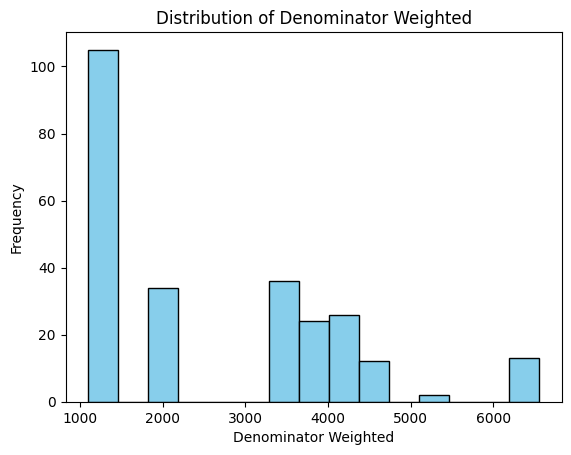

In [26]:
# Histogram for 'DenominatorWeighted'
plt.hist(df_cleaned['DenominatorWeighted'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Denominator Weighted")
plt.xlabel("Denominator Weighted")
plt.ylabel("Frequency")
plt.show()

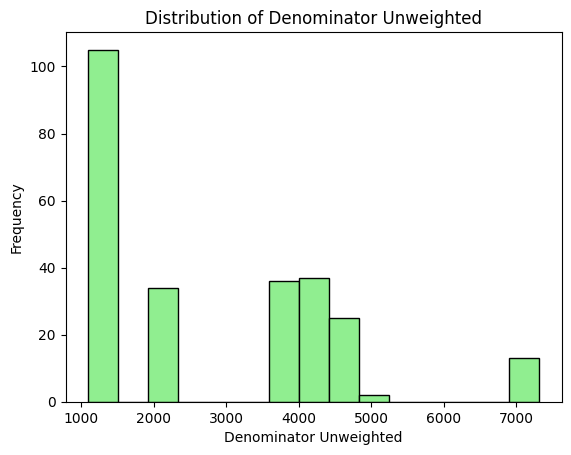

In [27]:
# Histogram for 'DenominatorUnweighted'
plt.hist(df_cleaned['DenominatorUnweighted'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Distribution of Denominator Unweighted")
plt.xlabel("Denominator Unweighted")
plt.ylabel("Frequency")
plt.show()

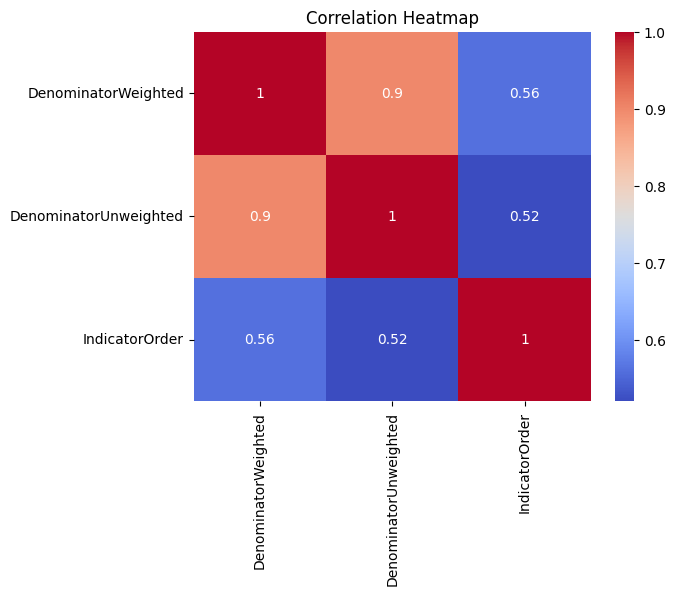

In [28]:
# Correlation heatmap
sns.heatmap(df_cleaned[['DenominatorWeighted', 'DenominatorUnweighted', 'IndicatorOrder', 
                        ]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

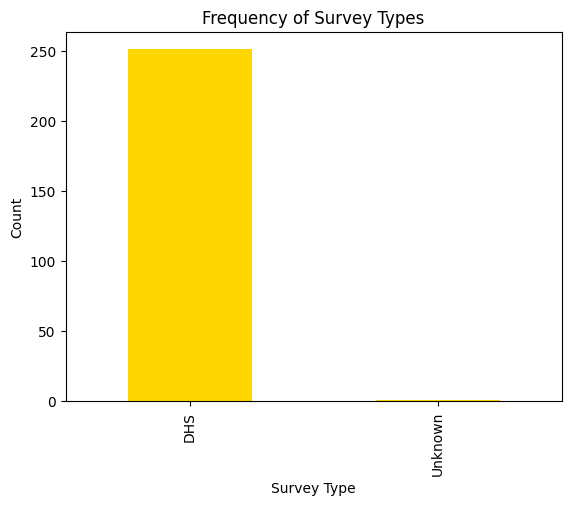

In [29]:
# Bar chart for 'SurveyType'
df_cleaned [ 'SurveyType'].value_counts().plot(kind='bar', color='gold')
plt.title("Frequency of Survey Types")
plt.xlabel("Survey Type")
plt.ylabel("Count")
plt.show()

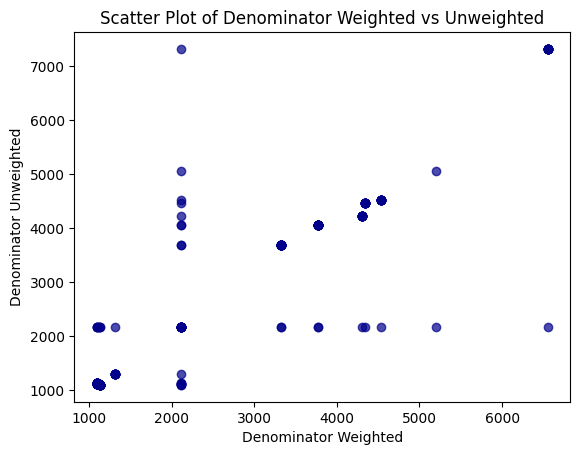

In [30]:
# Scatter plot of DenominatorWeighted vs DenominatorUnweighted
plt.scatter(df_cleaned['DenominatorWeighted'], df_cleaned['DenominatorUnweighted'], alpha=0.7, color='darkblue')
plt.title("Scatter Plot of Denominator Weighted vs Unweighted")
plt.xlabel("Denominator Weighted")
plt.ylabel("Denominator Unweighted")
plt.show()

## Feature Engineering

### 1. Create Ratios and Percentages

In [31]:
# Create ratios between DenominatorWeighted and DenominatorUnweighted
df_cleaned['Weighted_Unweighted_Ratio'] = df_cleaned['DenominatorWeighted'] / df_cleaned['DenominatorUnweighted']
df_cleaned['Weighted_Unweighted_Ratio']

0      0.977388
1      0.977388
3      1.009985
4      1.009985
5      1.009985
         ...   
345    0.896090
346    0.896090
347    0.896090
348    0.289582
349    3.024458
Name: Weighted_Unweighted_Ratio, Length: 252, dtype: float64

In [32]:
# Create vaccination Percentages
df_cleaned['Vaccination_Percentage'] = (df_cleaned['DenominatorWeighted'] / df_cleaned['DenominatorUnweighted']) * 100
df_cleaned['Vaccination_Percentage']

0       97.738809
1       97.738809
3      100.998464
4      100.998464
5      100.998464
          ...    
345     89.608969
346     89.608969
347     89.608969
348     28.958162
349    302.445778
Name: Vaccination_Percentage, Length: 252, dtype: float64

### 2. Apply Log Transformations

In [33]:
# Apply log transformation
df_cleaned['Log_DenominatorWeighted'] = np.log(df_cleaned['DenominatorWeighted'] + 1)
df_cleaned['Log_DenominatorUnweighted'] = np.log(df_cleaned['DenominatorUnweighted'] + 1)

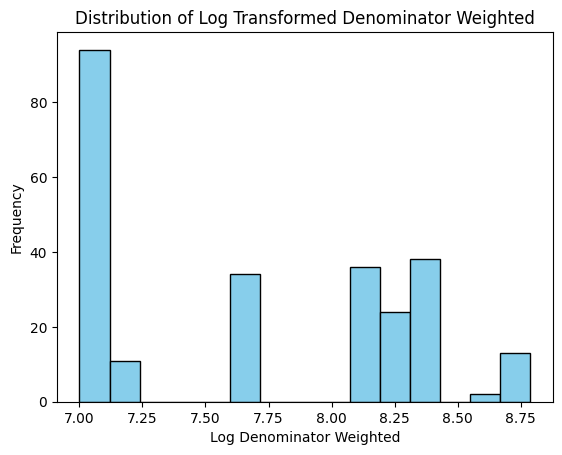

In [34]:
# Histogram of log-transformed data
plt.hist(df_cleaned['Log_DenominatorWeighted'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Log Transformed Denominator Weighted")
plt.xlabel("Log Denominator Weighted")
plt.ylabel("Frequency")
plt.show()

## Conclusion
The analysis of the dataset has provided valuable insights into vaccination coverage and health survey data. By handling missing values, outliers, and duplicates, and applying exploratory data analysis and feature engineering, we have prepared the dataset for deeper insights.

## Summary of Key Findings
1. **Trends in Vaccination Indicators:** Significant variability in weighted denominators (DenominatorWeighted) across survey years.
2. **Correlations:** Strong correlations observed between weighted and unweighted denominators.
3. **Feature Engineering:** New metrics such as Weighted_Unweighted_Ratio provided deeper insights into scaling effects. Log transformations normalized skewed data, aiding in clearer visualizations and analysis.

## Implications
The findings highlight regions and survey years requiring greater attention to allow resource allocation by policymakers so as to use these insights to better distribute vaccines and health resources across countries.

## Limitations
The dataset is limited in size (252 rows post-cleaning), which may impact the generalizability of insights. Some indicators lacked data, which could limit interpretation. Outlier handling were based on statistical assumptions.

## Future Work
Develop predictive models to identify high-risk regions. Conduct a deeper dive into specific countries or regions to uncover localized trends. Combine this dataset with other health datasets to enrich analysis.

## References

### ***data.humdata.org***
***(https://data.humdata.org/dataset/dhs-data-for-kenya?force_layout=desktop)***

In [37]:
# Save the cleaned data to an excel file with the full path
output_file_path = 'cleaned_immunization_national_ken.xlsx'
df_cleaned.to_excel(output_file_path, index=False, engine='openpyxl')

print("Data saved successfully as cleaned_immunization_national_ken.xlsx.")

Data saved successfully as cleaned_immunization_national_ken.xlsx.
